# **Question 1**

Text(0, 0.5, 'Output Intensity')

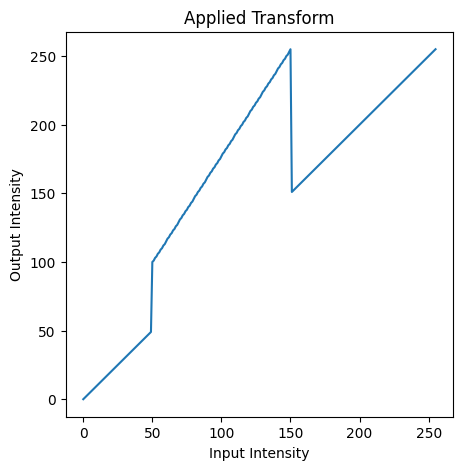

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Define the range for input and output intensities
input_range_start, input_range_end = 50, 150
output_range_start, output_range_end = 100, 255

# Create the transformation array
transformation = np.arange(256, dtype=np.uint8)
transformation[input_range_start: input_range_end+1] = np.linspace(output_range_start, output_range_end, input_range_end- input_range_start + 1, dtype=np.uint8)

# Plot the transformation curve
plt.figure(figsize=(5, 5))
plt.plot(transformation)
plt.title("Applied Transform")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")

(-0.5, 719.5, 809.5, -0.5)

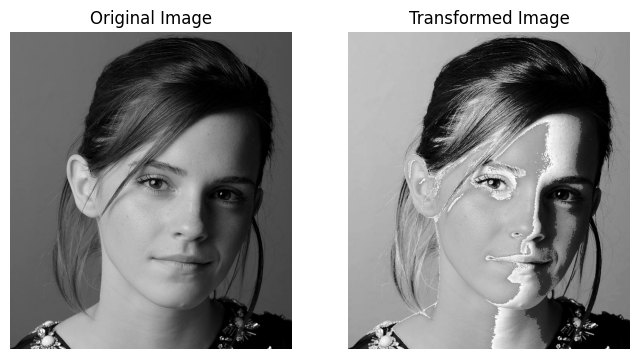

In [ ]:
# Load the image in grayscale
image = cv.imread("emma.jpg", cv.IMREAD_GRAYSCALE)

# Apply the transformation
transformed_image = transform[image]

# Display the original and transformed images side by side
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(transformed_image, cv.COLOR_BGR2RGB))
plt.title("Transformed Image")
plt.axis('off')


# **Question 2**

### **Grey and White Matter Transformation**

---



Text(0, 0.5, 'Output intensity')

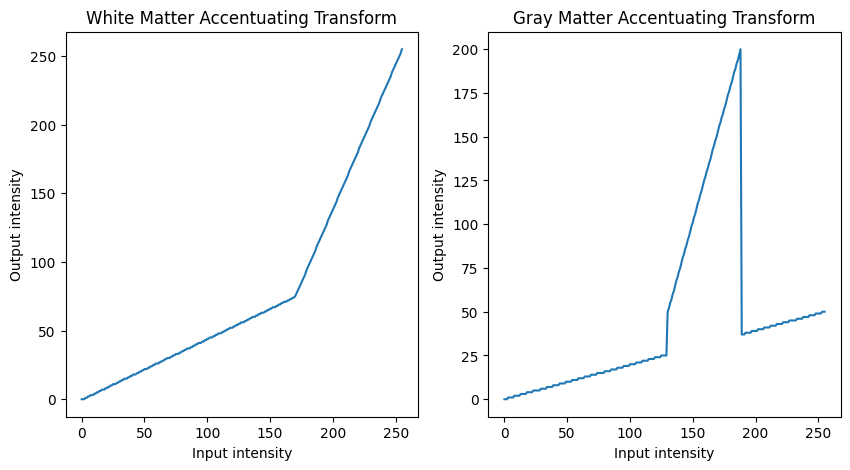

In [3]:
# White matter transformation
midpoint_x = 170
midpoint_y = 75

white_transform = np.arange(256, dtype=np.uint8)
white_transform[:midpoint_x + 1] = np.linspace(0, midpoint_y, midpoint_x + 1, dtype=np.uint8)
white_transform[midpoint_x:] = np.linspace(midpoint_y, 255, 256 - midpoint_x, dtype=np.uint8)

# Gray matter transformation
low_x, high_x = 130, 188
low_y, high_y = 50, 200

grey_transform = np.linspace(0, low_y, 256)
grey_transform = np.round(grey_transform).astype(np.uint8)
grey_transform[low_x:high_x + 1] = np.linspace(low_y, high_y, high_x + 1 - low_x, dtype=np.uint8)

plt.figure(figsize=(10, 5))
plt.rc("axes", titlesize=12)

plt.subplot(121)
plt.plot(white_transform)
plt.title("White Matter Accentuating Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

plt.subplot(122)
plt.plot(grey_transform)
plt.title("Gray Matter Accentuating Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")


(-0.5, 180.5, 216.5, -0.5)

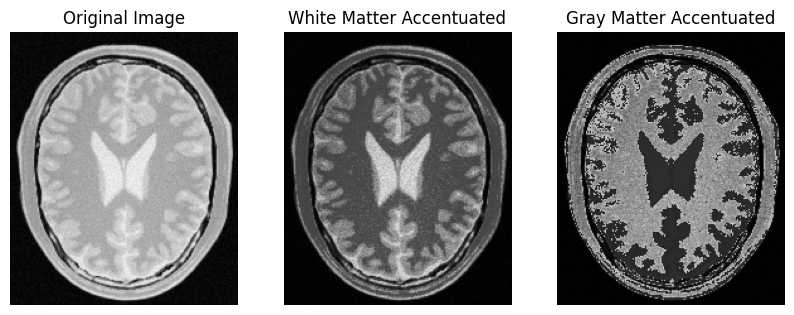

In [4]:
# Load the image and apply transformations
img2 = cv.imread("/content/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
white_matter_img = white_transform[img2]
gray_matter_img = grey_transform[img2]

# Plot the original and transformed images
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(132)
plt.imshow(cv.cvtColor(white_matter_img, cv.COLOR_BGR2RGB))
plt.title("White Matter Accentuated")
plt.axis('off')

plt.subplot(133)
plt.imshow(cv.cvtColor(gray_matter_img, cv.COLOR_BGR2RGB))
plt.title("Gray Matter Accentuated")
plt.axis('off')


# **Question 3**

(-0.5, 719.5, 479.5, -0.5)

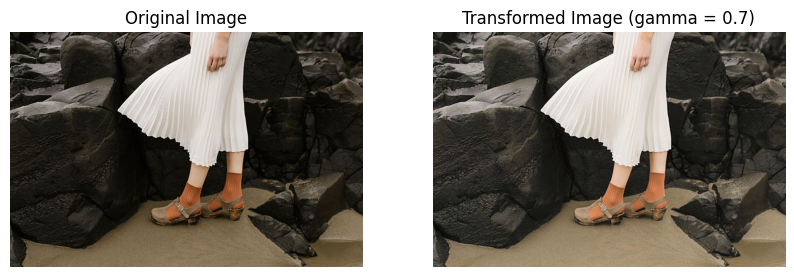

In [ ]:
gamma = 0.7
gamma_transform = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

img3 = cv.imread( "/content/highlights_and_shadows.jpg", cv.IMREAD_COLOR)
img3_lab = cv.cvtColor(img3, cv.COLOR_BGR2LAB)  # Convert to LAB color space
# In the LAB colour space, the L plane encodes brightness only
img3_lab[:, :, 0] = gamma_transform[img3_lab[:, :, 0]]  # Apply transform only to L plane

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(img3_lab, cv.COLOR_LAB2RGB))
plt.title(f"Transformed Image (gamma = {gamma})")
plt.axis('off')

Text(0, 0.5, 'Frequency')

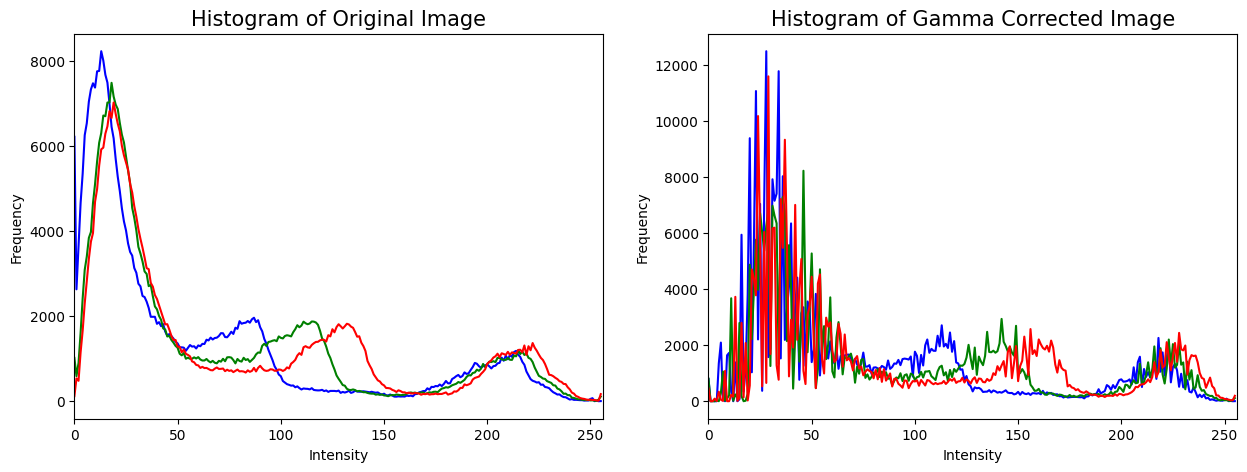

In [ ]:
# Function to compute and plot histograms for the three color channels
def plot_histogram_bgr(image):
    # Define the color channels (blue, green, red)
    colors = ('b', 'g', 'r')

    # Loop through each color channel and compute its histogram
    for i, color in enumerate(colors):
        histogram = cv.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color)
        plt.xlim([0, 256])

# Set up the figure for displaying the histograms
plt.figure(figsize=(15, 5))
plt.rc('axes', titlesize=15)

# Plot the histogram for the original image
plt.subplot(121)
plot_histogram_bgr(img3)
plt.title("Histogram of Original Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

# Plot the histogram for the gamma-corrected image
plt.subplot(122)
plot_histogram_bgr(cv.cvtColor(img3_lab, cv.COLOR_LAB2BGR))
plt.title("Histogram of Gamma Corrected Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency")


# **Question 4**

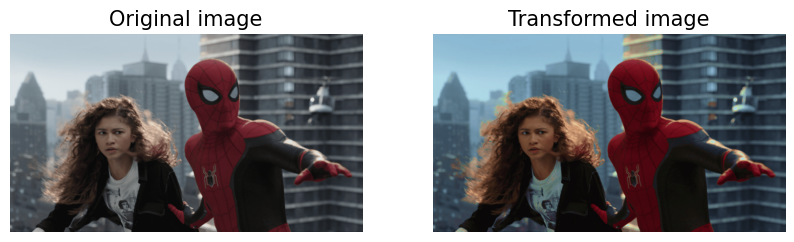

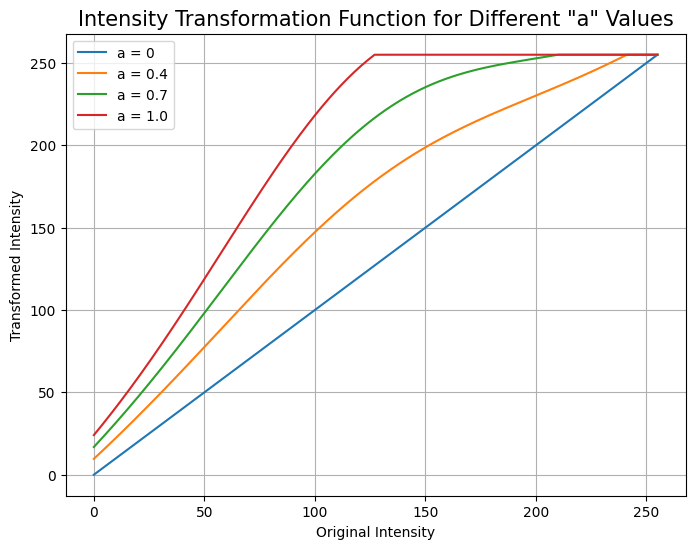

In [ ]:
# Load the image in BGR color space
image_bgr = cv.imread('/content/spider.png', cv.IMREAD_COLOR)

# Convert the BGR image to HSV color space
image_hsv = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Extract the saturation (S) plane
h, saturation_plane, v = cv.split(image_hsv)

# Define the intensity transformation function
def intensity_transform(x, a, sigma=70):
    f_x = np.clip(x+a*128*np.exp(-(x-128)**2/(2*sigma**2)), 0, 255)
    return f_x

# Apply the intensity transform function
transforemed_saturation_plane = intensity_transform(saturation_plane, 0.4)

image_copy = image_hsv.copy()
# recombine the planes
image_copy[:, :, 1] = transforemed_saturation_plane

# Convert the HSV image back to BGR color space
original_image = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)
transformed_image = cv.cvtColor(image_copy, cv.COLOR_HSV2RGB)

# Display the images and plots
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(original_image)
axarr[0].set_title('Original image')
axarr[0].axis('off')
axarr[1].imshow(transformed_image)
axarr[1].set_title('Transformed image')
axarr[1].axis('off')

intensity_values = np.arange(256)
a_values = [0, 0.4, 0.7, 1.0]
plt.figure(figsize=(8, 6))

for a in a_values:
    transformation_values = intensity_transform(intensity_values, a)
    plt.plot(intensity_values, transformation_values, label=f'a = {a}')

plt.title('Intensity Transformation Function for Different "a" Values')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()

# **Question 5**

In [ ]:
def histogram_equalization(im):
    img = cv.imread(im,cv.IMREAD_GRAYSCALE)

    # Calculate the histogram of the image
    histogram = np.zeros(256, dtype=int)
    for pixel_value in img.flat:
        histogram[pixel_value] += 1

    # Calculate the cumulative distribution function (CDF)
    cdf = np.zeros(256, dtype=int)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + histogram[i]

    # Perform histogram equalization
    num_pixels = img.size
    equalized_image = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_value = img[i, j]
            equalized_pixel = int((cdf[pixel_value] / num_pixels) * 255)
            equalized_image[i, j] = equalized_pixel

    # Calculate the histogram of the equalized image
    histogram_equalized = np.zeros(256, dtype=int)
    for pixel_value in equalized_image.flat:
        histogram_equalized[pixel_value] += 1

    # Plot the original and equalized images
    fig, ax = plt.subplots(1, 2, figsize=(5, 5))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(equalized_image, cmap='gray')
    ax[1].set_title('Equalized Image')
    ax[1].axis('off')

    # Plot the original and equalized histograms
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    ax[0].plot(histogram)
    ax[0].set_title('Original Histogram')
    ax[0].set_xlim([0, 256])
    ax[1].plot(histogram_equalized)
    ax[1].set_title('Equalized Histogram')
    ax[1].set_xlim([0, 256])

    plt.show()

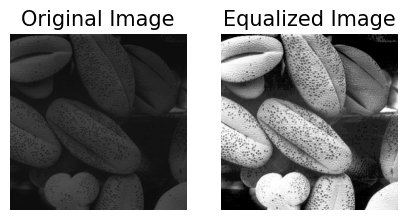

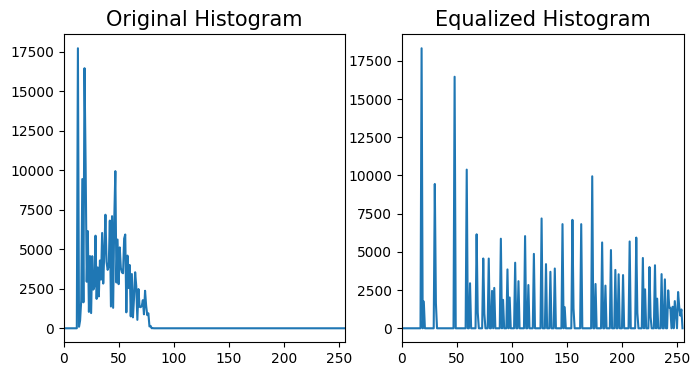

In [ ]:
histogram_equalization('/content/shells.tif')


# **Question 6**

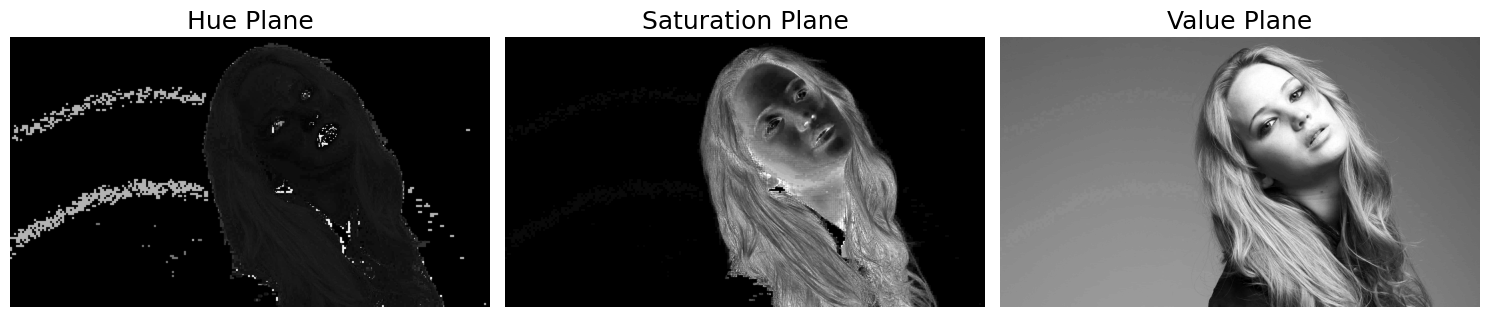

In [ ]:
img6 = cv.imread( "/content/jeniffer.jpg", cv.IMREAD_COLOR)

# Separating into HSV planes
img6_hsv = cv.cvtColor(img6, cv.COLOR_BGR2HSV)
hue_plane = img6_hsv[:, :, 0]
saturation_plane = img6_hsv[:, :, 1]
value_plane = img6_hsv[:, :, 2]

plt.figure(figsize = (15, 10))
plt.rc("axes", titlesize = 18)
plt.subplot(131)
plt.imshow(img6_hsv[:, :, 0], cmap = 'gray')
plt.title("Hue Plane")
plt.axis('off')
plt.subplot(132)
plt.imshow(img6_hsv[:, :, 1], cmap = 'gray')
plt.title("Saturation Plane")
plt.axis('off')
plt.subplot(133)
plt.imshow(img6_hsv[:, :, 2], cmap = 'gray')
plt.title("Value Plane")
plt.axis('off')
plt.tight_layout()

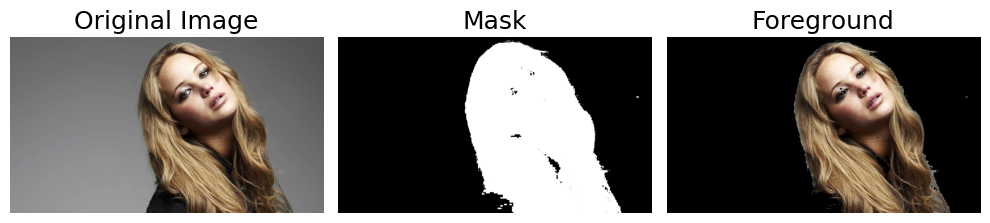

In [ ]:
# Saturation plane can be used to extract the foreground
threshold = 12  # This was adjusted until the separation was satisfactory
mask = (saturation_plane > threshold).astype(np.uint8) * 255
mask_3d = np.repeat(mask[:, :, None], 3, axis=2)

foreground_hsv = np.bitwise_and(img6_hsv, mask_3d)  # obtaining the foreground
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)

plt.figure(figsize = (10, 10))
plt.subplot(131)
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask_3d)
plt.title('Mask')
plt.axis('off')
plt.subplot(133)
plt.imshow(foreground_rgb)
plt.title('Foreground')
plt.axis('off')
plt.tight_layout()

Text(0.5, 1.0, 'Cumulative Histogram of Foreground')

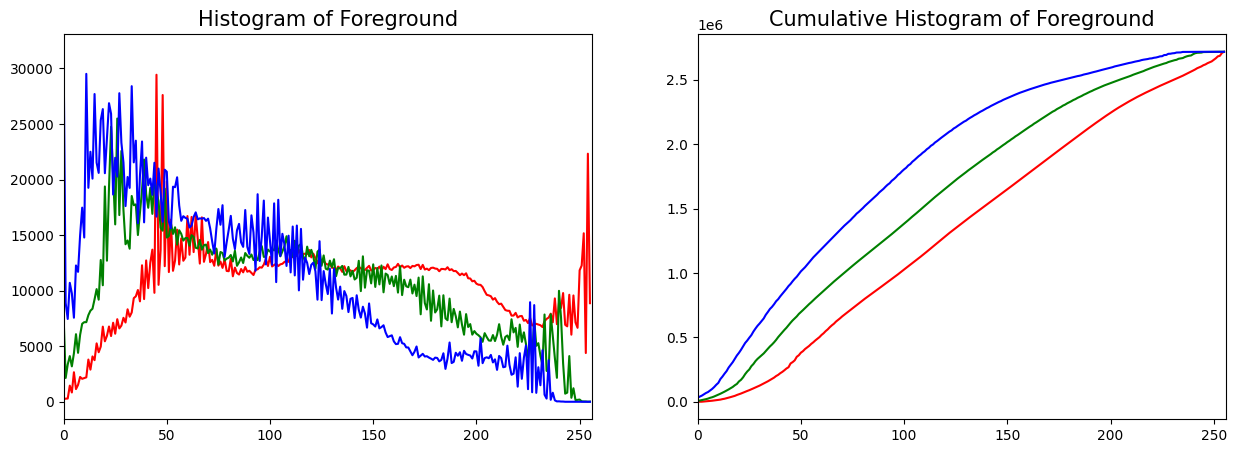

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.rc("axes", titlesize=15)

# Create a copy of the foreground image for equalization
equalized_foreground = foreground_rgb.copy()
channels = ('r', 'g', 'b')
foreground_pixels = mask.sum() // 255

# Loop through each color channel and calculate histograms
for i, channel in enumerate(channels):
    # Compute the histogram considering only the foreground using the mask
    hist = cv.calcHist([foreground_rgb], [i], mask, [256], [0, 256])
    ax[0].plot(hist, color=channel)
    ax[0].set_xlim([0, 256])

    # Compute the cumulative sum of the histogram
    cumulative_hist = np.cumsum(hist)
    ax[1].plot(cumulative_hist, color=channel)
    ax[1].set_xlim([0, 256])

    # Apply histogram equalization by transforming intensity values
    transformation = cumulative_hist * 255 / cumulative_hist[-1]
    equalized_foreground[:, :, i] = transformation[foreground_rgb[:, :, i]]

# Reapply the mask after equalization to remove the background
equalized_foreground = np.bitwise_and(equalized_foreground, mask_3d)

# Set plot titles
ax[0].set_title("Histogram of Foreground")
ax[1].set_title("Cumulative Histogram of Foreground")


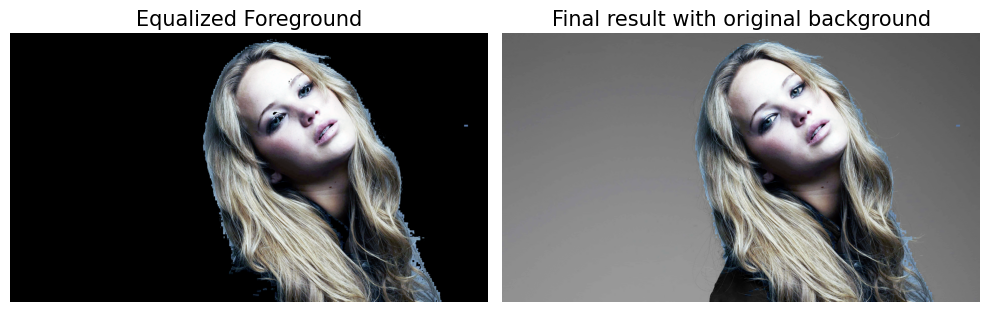

In [ ]:
background_mask_3d = 255 - mask_3d
background_hsv = np.bitwise_and(img6_hsv, background_mask_3d)   # Extract background
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)
final_image = background_rgb + equalized_foreground     # Add with foreground

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(equalized_foreground)
plt.title('Equalized Foreground')
plt.axis('off')
plt.subplot(122)
plt.imshow(final_image)
plt.title('Final result with original background')
plt.axis('off')
plt.tight_layout()

# **Question 7**

In [ ]:
# Custom function to apply a filter to an image
def apply_filter(image, kernel):
    # Ensure the kernel dimensions are odd
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1

    # Calculate kernel half-heights and half-widths
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape

    # Normalize the image to the range [0, 1]
    image_float = cv.normalize(image.astype('float'), None, 0, 1, cv.NORM_MINMAX)

    # Initialize an empty result array
    result = np.zeros(image.shape, dtype='float')

    # Apply the filter by looping over the image
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image_float[m - k_hh: m + k_hh + 1, n - k_hw: n + k_hw + 1].flatten(), kernel.flatten())

    # Rescale the result to [0, 255]
    result = result * 255
    result = np.clip(result, 0, 255).astype(np.uint8)  # Ensure values are within [0, 255]
    return result

# Define a function to filter a normalized image without rounding
def apply_filter_step(image, kernel):
    # Ensure the kernel dimensions are odd
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1

    # Calculate kernel half-heights and half-widths
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape

    # Initialize an empty result array
    result = np.zeros(image.shape, dtype='float')

    # Apply the filter in a single step
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image[m - k_hh: m + k_hh + 1, n - k_hw: n + k_hw + 1].flatten(), kernel.flatten())

    return result

# Function to apply two consecutive filters to an image
def apply_filter_in_steps(image, kernel1, kernel2):
    # Normalize the image to the range [0, 1]
    image_float = cv.normalize(image.astype('float'), None, 0, 1, cv.NORM_MINMAX)

    # Apply the first and second filters in sequence
    result = apply_filter_step(apply_filter_step(image_float, kernel1), kernel2)

    # Rescale the result to [0, 255] and clip the values
    result = result * 255
    result = np.clip(result, 0, 255).astype(np.uint8)  # Ensure values are within [0, 255]
    return result


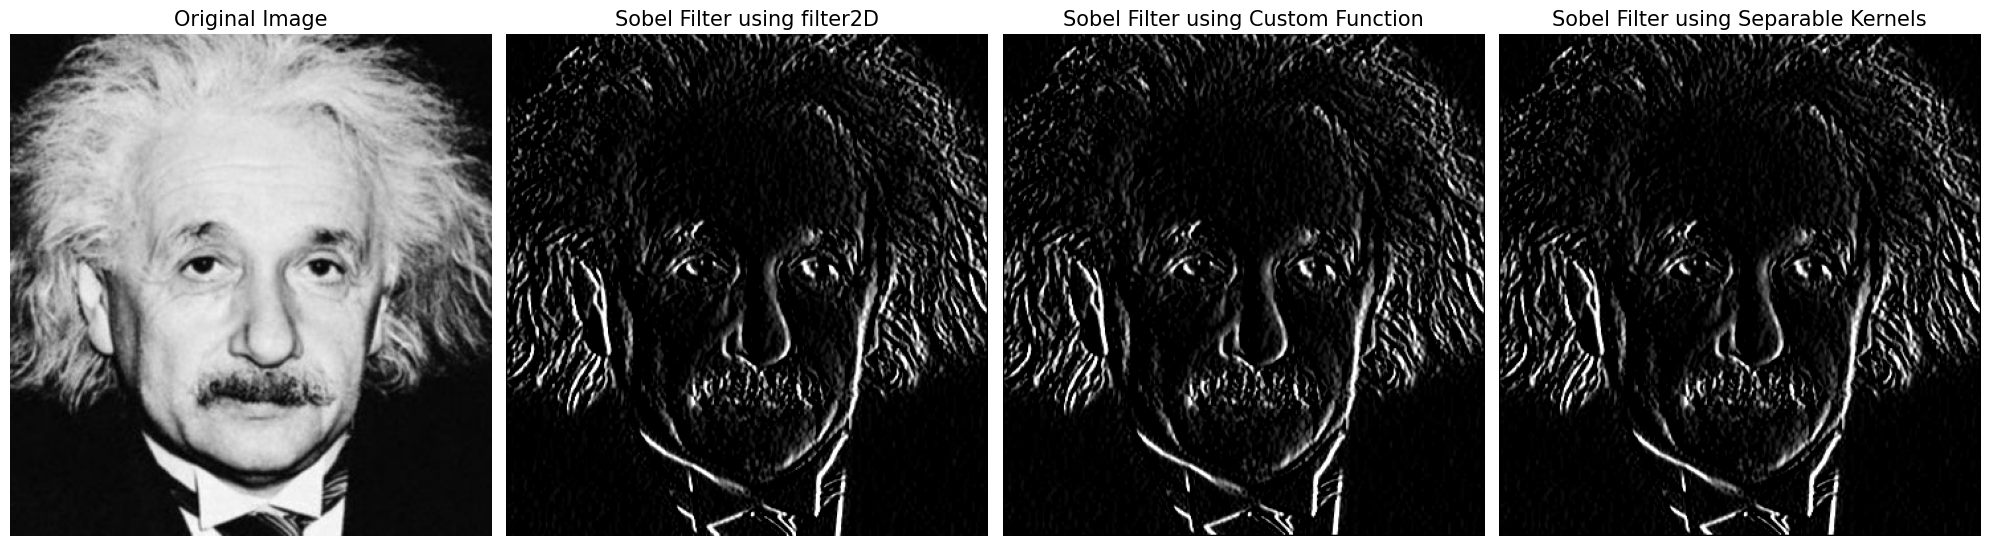

In [ ]:
# Load the grayscale image
img7 = cv.imread("/content/einstein.png", cv.IMREAD_GRAYSCALE)

# Define Sobel vertical kernel
sobel_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

# Apply Sobel filter using OpenCV's filter2D function
img7_a = cv.filter2D(img7, -1, sobel_kernel)

# Apply Sobel filter using the custom filter function
img7_b = apply_filter(img7, sobel_kernel)

# Define separate kernels for convolution
kernel1 = np.array([1, 2, 1]).reshape((3, 1))
kernel2 = np.array([1, 0, -1]).reshape((1, 3))

# Apply convolution using the property of separable kernels
img7_c = apply_filter_in_steps(img7, kernel1, kernel2)

# Plot the original and filtered images
plt.figure(figsize=(20, 10))
plt.rc('axes', titlesize=15)

plt.subplot(141)
plt.imshow(img7, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(img7_a, cmap='gray')
plt.title('Sobel Filter using filter2D')
plt.axis('off')

plt.subplot(143)
plt.imshow(img7_b, cmap='gray')
plt.title('Sobel Filter using Custom Function')
plt.axis('off')

plt.subplot(144)
plt.imshow(img7_c, cmap='gray')
plt.title('Sobel Filter using Separable Kernels')
plt.axis('off')

plt.tight_layout()


# **Question 8**

In [ ]:
# Function to interpolate pixel values for a color image
def interpolate(image, indices, method):
    if method == 'nn':  # Nearest neighbor interpolation
        indices[0] = np.minimum(np.round(indices[0]), image.shape[0] - 1)
        indices[1] = np.minimum(np.round(indices[1]), image.shape[1] - 1)
        indices = indices.astype(np.uint64)
        return image[indices[0], indices[1]]

    elif method == 'bi':  # Bilinear interpolation
        floors = np.floor(indices).astype(np.uint64)
        ceils = floors + 1

        # Ensure ceiling indices don't go out of bounds
        ceils_limited = [np.minimum(ceils[0], image.shape[0] - 1), np.minimum(ceils[1], image.shape[1] - 1)]

        # Extract the four corner pixels
        p1 = image[floors[0], floors[1]]
        p2 = image[floors[0], ceils_limited[1]]
        p3 = image[ceils_limited[0], floors[1]]
        p4 = image[ceils_limited[0], ceils_limited[1]]

        # Repeat indices for each color channel
        indices = np.repeat(indices[:, :, :, None], 3, axis=3)
        ceils = np.repeat(ceils[:, :, :, None], 3, axis=3)
        floors = np.repeat(floors[:, :, :, None], 3, axis=3)

        # Interpolate horizontally between pixels
        m1 = p1 * (ceils[1] - indices[1]) + p2 * (indices[1] - floors[1])
        m2 = p3 * (ceils[1] - indices[1]) + p4 * (indices[1] - floors[1])

        # Interpolate vertically between the horizontal midpoints
        m = m1 * (ceils[0] - indices[0]) + m2 * (indices[0] - floors[0])
        return m.astype(np.uint8)

# Function to zoom an image by a scaling factor
def zoom(image, factor, interpolation='nn'):
    h, w, _ = image.shape
    zoom_h, zoom_w = round(h * factor), round(w * factor)

    # Initialize an empty zoomed image
    zoomed_image = np.zeros((zoom_h, zoom_w, 3)).astype(np.uint8)

    # Compute the corresponding indices in the original image
    zoomed_indices = np.indices((zoom_h, zoom_w)) / factor

    # Apply the interpolation method to fill the zoomed image
    zoomed_image = interpolate(image, zoomed_indices, interpolation)

    return zoomed_image

# Function to compute the normalized sum of squared differences (SSD) between two images
def normalized_ssd(image1, image2):
    ssd = np.sum((image1 - image2) ** 2)
    return ssd / (image1.size * 255 * 255)


In [ ]:
img8 = cv.imread( "/content/im01small.png", cv.IMREAD_COLOR)
original_img8 = cv.imread( "/content/im01.png", cv.IMREAD_COLOR)

zoomed_nn = zoom(img8, 4, 'nn')
#print(normalized_ssd(zoomed_nn, original_img8))

zoomed_bi = zoom(img8, 4, 'bi')
#print(normalized_ssd(zoomed_bi, original_img8))

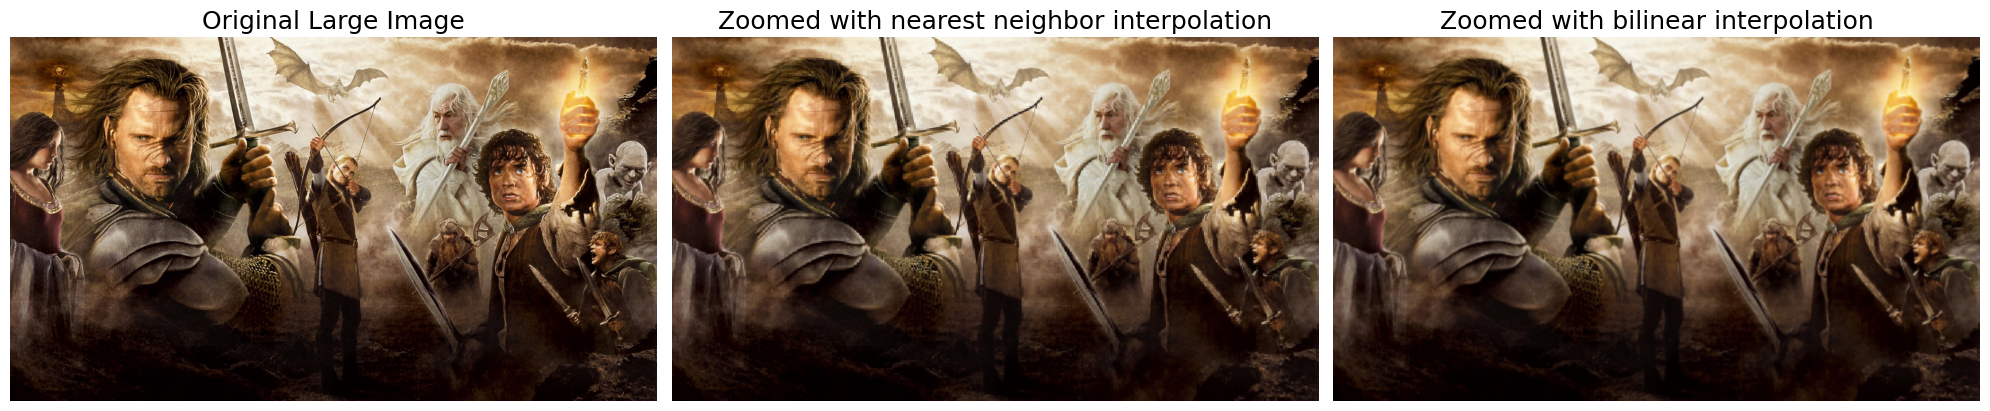

In [ ]:
plt.figure(figsize = (20, 10))
plt.rc("axes", titlesize = 18)
plt.subplot(131)
plt.imshow(cv.cvtColor(original_img8, cv.COLOR_BGR2RGB))
plt.title('Original Large Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(cv.cvtColor(zoomed_nn, cv.COLOR_BGR2RGB))
plt.title('Zoomed with nearest neighbor interpolation')
plt.axis('off')
plt.subplot(133)
plt.imshow(cv.cvtColor(zoomed_bi, cv.COLOR_BGR2RGB))
plt.title('Zoomed with bilinear interpolation')
plt.axis('off')
plt.tight_layout()

In [ ]:
print("Normalized sum of squared differences")
for i in range(1, 4):
    num = str(i).zfill(2)
    small_image = cv.imread(f"/content/im{num}small.png", cv.IMREAD_COLOR)
    large_image = cv.imread(f"/content/im{num}.png", cv.IMREAD_COLOR)

    zoomed_nn = zoom(small_image, 4, "nn")
    zoomed_bi = zoom(small_image, 4, "bi")
    try:
        print(f"Image {num}: Nearest neighbors = {normalized_ssd(zoomed_nn, large_image)},\tBilinear = {normalized_ssd(zoomed_bi, large_image)}")
    except: pass

Normalized sum of squared differences
Image 01: Nearest neighbors = 0.0006168664775379207,	Bilinear = 0.0006037221557710472
Image 02: Nearest neighbors = 0.00025825407028279724,	Bilinear = 0.00024931605721446165


# **Question 9**

In [ ]:
# Load and prepare the image
img9 = cv.imread("/content/daisy.jpg", cv.IMREAD_COLOR)
img9 = cv.cvtColor(img9, cv.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(img9.shape[:2], np.uint8)
mask[150:550, 50:600] = cv.GC_PR_FGD  # Mark the inner region as probable foreground
mask[300:410, 220:380] = cv.GC_FGD    # Mark the flower center as definite foreground to prevent holes

# Initialize background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define the rectangle for grabCut
rect = (50, 150, 612 - 50, 600 - 150)
iters = 5  # Number of iterations for grabCut

# Apply grabCut using the initial mask
cv.grabCut(img9, mask, rect, bgdModel, fgdModel, iters, cv.GC_INIT_WITH_MASK)

# Set pixels that are background or probable background to 0, others to 1
foreground_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
background_mask = 1 - foreground_mask  # Background mask as the inverse

# Extract the foreground and background from the image
foreground_img9 = img9 * foreground_mask[:, :, np.newaxis]
background_img9 = img9 * background_mask[:, :, np.newaxis]


In [ ]:
# Image with blurred background
kernel = 51
sigma = 5
blurred_background = cv.GaussianBlur(background_img9, (kernel, kernel), sigma)
blurred_background = blurred_background * background_mask[:, :, np.newaxis]

final_img9 = blurred_background + foreground_img9

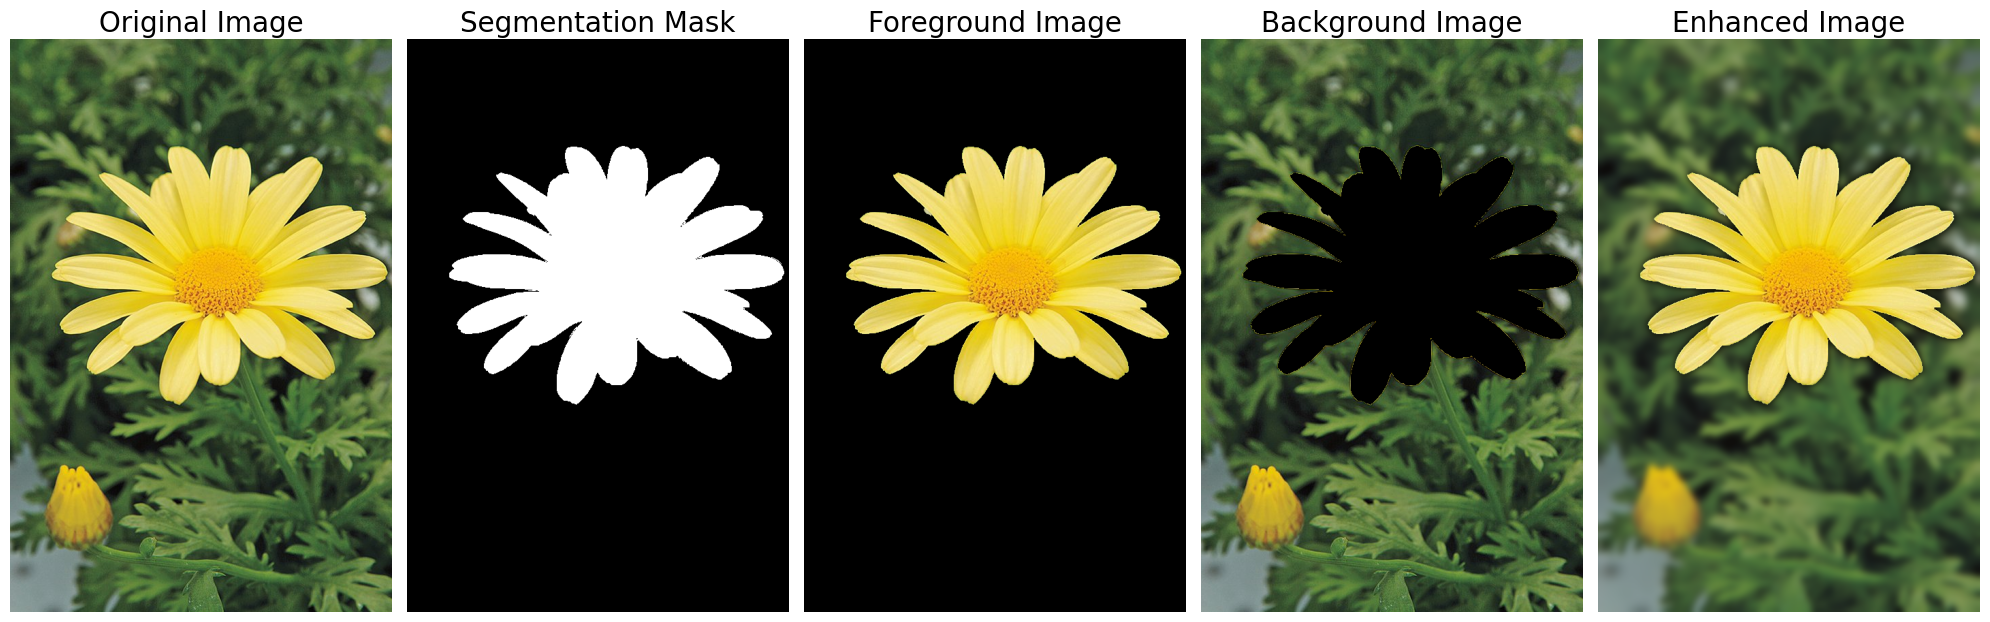

In [ ]:
plt.figure(figsize = (20, 10))
plt.rc('axes', titlesize=20)
plt.subplot(151)
plt.imshow(img9)
plt.title('Original Image')
plt.axis('off')
plt.subplot(152)
plt.imshow(foreground_mask, cmap = 'gray')
plt.title('Segmentation Mask')
plt.axis('off')
plt.subplot(153)
plt.imshow(foreground_img9)
plt.title('Foreground Image')
plt.axis('off')
plt.subplot(154)
plt.imshow(background_img9)
plt.title('Background Image')
plt.axis('off')
plt.subplot(155)
plt.imshow(final_img9)
plt.title('Enhanced Image')
plt.axis('off')
plt.tight_layout()


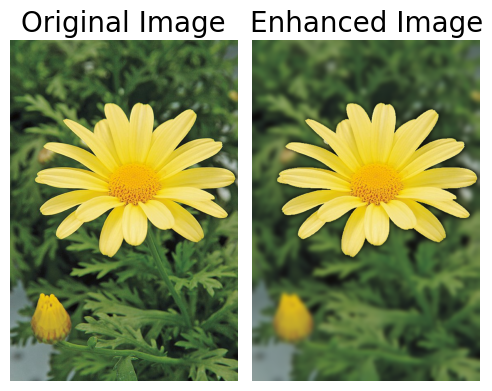

In [ ]:
# Image with blurred background
kernel = 51
sigma = 5
blurred_background = cv.GaussianBlur(background_img9, (kernel, kernel), sigma)
blurred_background = blurred_background * background_mask[:, :, np.newaxis]

final_img9 = blurred_background + foreground_img9

plt.figure(figsize = (5, 5))
plt.subplot(121)
plt.imshow(img9)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(final_img9)
plt.title('Enhanced Image')
plt.axis('off')
plt.tight_layout()